## Overview of seaborn plotting function
- Seaborn과의 상호작용은 여러 그래프를 그리면서 이루어질 것입니다. 
- 나중에는 각 함수에서 제공되는 특별한 기능에 대한 튜토리얼을 배워볼 것입니다. 
- 이번 챕터에서는 high-level의 다양한 함수를 살펴볼 것 입니다..

❗️ Seaborn high-level API vs low-level API 
- high-level API : 그래프를 그릴 때 복잡한 것은 숨기고 쉽고 빠르게 시각화 할 수 있는 함수
- low-level API : 그래프의 시각화를 더 디테일하고 세부적인 사항을 조정할 수 있는 함수

## Similar functions for similar tasks 

- Seaborn의 명칭은 직관적입니다. 모든 함수는 상위 레벨에서 접근이 가능합니다. 
- 그러나 코드 자체는 다른 방법으로 비슷한 시각화 목표를 이루어내는 함수 모듈들이 계층적으로 구성되어 있습니다. 
- 대부분의 문서는 이러한 모듈로 구성되어 있다. 따라서 그래프의 이름 중에는 "관계형", "분포형', '범주형'과 같은 이름이 흔합니다. 



- 예를 들어서 분포형 모듈은 데이터 포인트의 분포를 나타내는데 특화되어 있습니다.
- 히스토그램도 분포형 함수중 하나입니다.

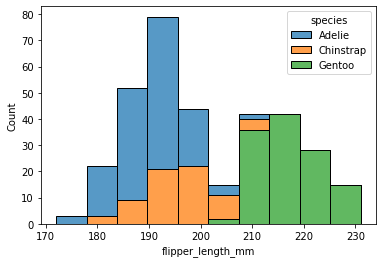

In [2]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple='stack');

🧑‍💻 그래프의 파라미터 설명 
- data : 불러오고자 하는 데이터 프레임
- x : x 축
- hue : 변수의 그룹지정 -> 서로 다른 색상
- multiple : 다수의 요소들을 어떤 방식으로 표현할 것인지 설정/ ex) layer,dodge,stack,fill

- kernel density를 시각화 하기 위해서는 `kdeplot()` 과 똑같은 코드를 사용하고 `kind` parameter로 `"kde"`를 고르면 가능합니다. 

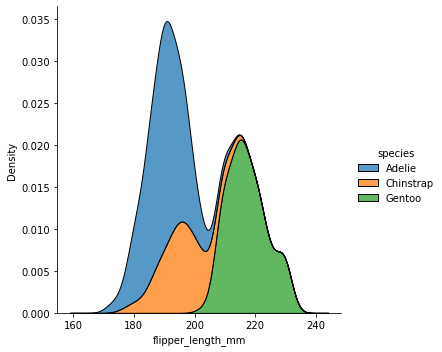

In [3]:
sns.displot(data=penguins, 
            x="flipper_length_mm", hue="species", 
            kind="kde", multiple="stack");

🧑‍💻 그래프의 파라미터 설명 
- data : 불러오고자 하는 데이터 프레임
- x : x 축
- hue : 변수의 그룹지정 -> 서로 다른 색상
- kind : 어떤 종류의 그래프를 시각화할 지 결정
- multiple : 다수의 요소들을 어떤 방식으로 표현할 것인지 설정/ ex) layer,dodge,stack,fill

- 모듈의 함수들은 많은 코드를 공유하고 라이브러리에서 제공되지 않은 비슷한 기능들도 제공합니다(예시 `multiple='stack`)
- 저 데이터셋을 살펴볼 때 서로 다른 시각화 표현을 쉽게 바꿀수 있게끔 디자인 되었습니다.
- 왜냐하면 위와 같이 서로 다른 표현을 했을때 더 보기 좋을 수도 있고 아닐 수도 있기 때문입니다. 

## Figure-level vs axes-level functions 

- Seaborn 함수에는 "axes-level" 또는 "figure-lvel"로 분류할 수 있습니다. 
- 위에 있는 예시들은 "axes-level" 함수입니다. 
- 간단하게 `matplotlib.pyplot.Axes` object로 그래프를 그립니다.

- 반대로, figure-level 함수의 인터페이스는 `FacetGrid`라는 그래프의 크기를 조정하는 object와 작동합니다.
- 각각의 모듈은 하나의 figure-level function이며 다양한 axes-level 함수의 통합된 인터페이스를 제공합니다. 

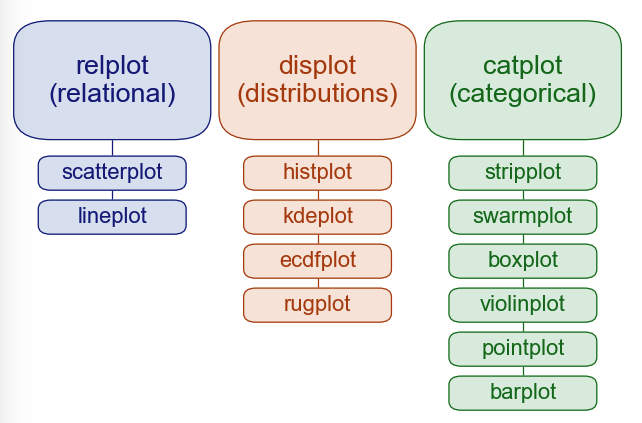

- figure-level functions : relplot, displot, catplot
- axes-level functions : 위 그림의 하위 함수들 

- 예를 들어 displot()은 분포를 나타내는 figure-level 함수입니다. 
- displot()의 default 기능은 히스토그램을 그립니다. (hisplot()과 같은 코드를 사용합니다) 

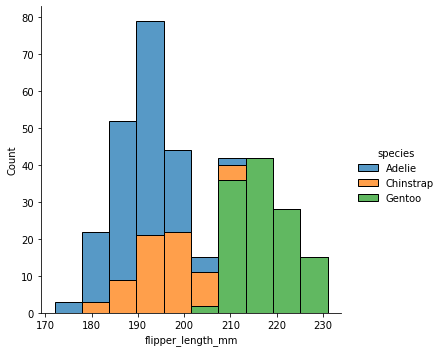

In [4]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

- 대신 Kernel density 그래프를 드리려면, kdeplot( )을 사용할 수 있지만, `kind` 파라미터에서 고를수도 있습니다. 

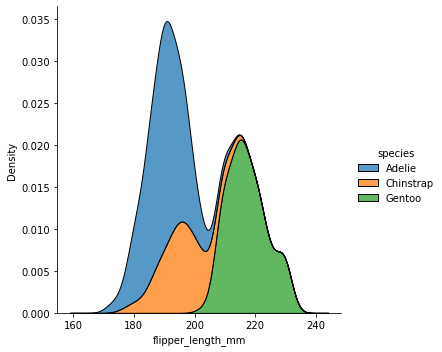

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", 
            hue='species', multiple='stack', kind='kde');

- figure-level 그래프는 axes-level과 상응하는 것을 확인할 수 있습니다. 
- 눈여겨 볼 점은 범례가 그래프 바깥에 위치해 있습니다. 두 그래프는 살짝 다른 모양을 보여줍니다. 

- figure-level 함수의 가장 쓸만함 기능은 여러가지 subplot을 손쉽게 만들 수 있다는 점입니다. 
- 예를 들어 펭귄 종의 분포를 겹치지 말고 `facet`을 이용해서 한 행에 각각의 분포를 보여줄 수 있습니다. 

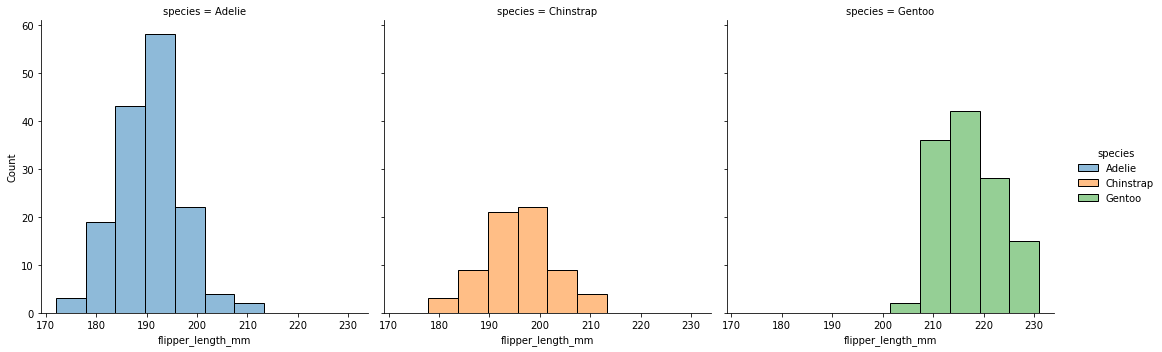

In [6]:
sns.displot(data=penguins, x='flipper_length_mm', hue="species", col='species');

- figure-level 함수는 상응하는 axes-level 함수를 묶고 특정 keyword argument를 해당 function으로 전달합니다. (예를 들어 히스토그램의 bin size) 
- 따라서, 여전히 유연합니다. 하지만 불리한 점도 있습니다. 
- 그리려고 하는 그래프의 `kind`의 특정 파라미터가 문서에 보이지 않습니다. 
- 그러므로 디테일한 부분을 고치려면 `kind`의 그래프 문서에 가서 직접 확인하고 사용해야하는 불편한 점이 있습니다. 

## Axes-level functions make self-contained plots

- axes-level 함수는 matplotlib 함수와 같은 방법으로 작동하게 디자인 되었습니다. 하지만 더 쉽게 접근할 수 있는것이 특징입니다. 
- axis label 과 legends(범례)를 자동적으로 그리는 와중에 axes-level 함수가 그리는 것 이외에는 수정하지 않습니다. 
- 이 뜻은 예측할만한 결과를 가진 arbitrarily-complex matplotlib 그래프를 구성할 수 있습니다. 

- `matplotlib.pyplot.gca()`라고 불리우는 axes-level 함수는 내부적으로 matplotlib의 state-machine 인터페이스를 가져와 "currentlt-active"(현재 활성화 되어있는) 축에 그래프를 그립니다. 
- 이 인터페이스는 추가적으로 `ax=` 명령어를 가져와 그래프가 어느 위치에 생성될 지 명시합니다.

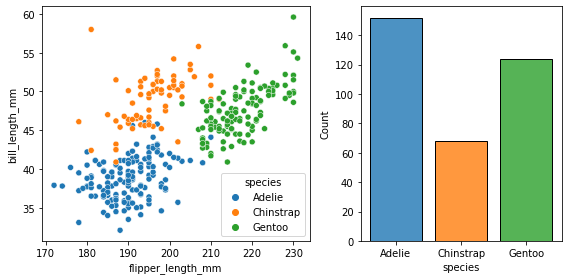

In [7]:
import matplotlib.pyplot as plt
# 1번
f, axs = plt.subplots(1,2, figsize=(8,4), gridspec_kw=dict(width_ratios=[4,3]))
# 2번
sns.scatterplot(data=penguins, x='flipper_length_mm', y="bill_length_mm", hue='species', ax=axs[0])
# 3번
sns.histplot(data=penguins, x='species', hue='species', shrink=.8, alpha=.8, legend=False, ax=axs[1])
# 4번
f.tight_layout()

🧑‍💻 그래프의 파라미터 설명 
- 1번 : 서브플롯 생성, 1*2 사이즈의 그래프, 그래프 비율 설정 
- 2번 : 1번 플롯에 scatter plot 생성
- 3번 : 2번 플롯에 histogram 생성, shrink: 그래프 폭 크기, alpha : 투명도 지정, 범례 지정 x 
- 4번 : 서브플롯 그릴때 그래프가 겹치는 것을 방지 

## Figure-level functions own their figure 

- 반대로 figure-level 함수는 다른 그래프들과 같이 구성하기 어렵습니다. 
- 설계상, figure-level 함수에서는 각자 해당하는 그래프가 있습니다.
- 그래서 이미 존재하는 축에 figure-level 함수를 추가하는 개념은 없습니다. 
- 이러한 제한사항은 figure-level 함수의 기능에서 범례를 바깥에 넣는거와 같은 기능을 이용할 수 있습니다. 

- 그럼에도 불구하고 matplotlib으로 접근해 다른 요소를 더할 수 있습니다. 

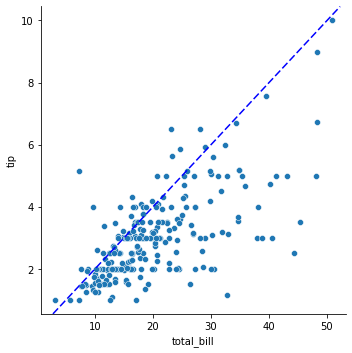

In [8]:
# 1번
tips = sns.load_dataset("tips")
# 2번
g = sns.relplot(data=tips, x='total_bill', y='tip')
# 3번
g.ax.axline(xy1=(10,2), slope=.2, color="b", dashes=(5,2))

- 1번 : 데이터셋 불러오기 
- 2번 : figure-level function인 relplot으로 scatter plot 생성 
- 3번 : 기존 그래프에 추가적인 정보를 보여줌 / 파라미터 : 지나가는 점, 기울기, 색깔, 대시선 크기 

## Customizing plots from a figure-level function 

- `FacetGrid`는 서브플롯을 구성하는데 몇가지 방법으로 특성을 커스텀화하는 방법입니다.
- 예를 들어서 한 줄의 코드로 외부 축의 레이블을 바꿀 수 있습니다. 

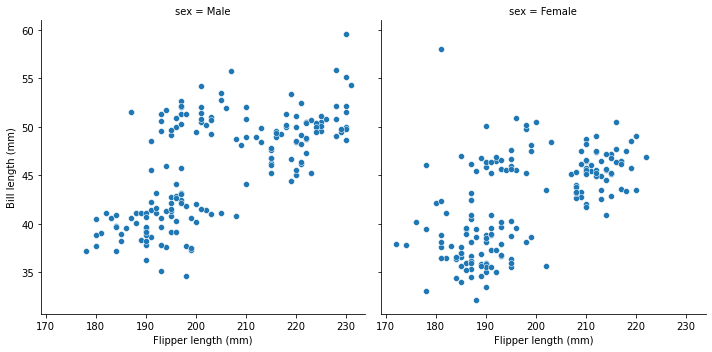

In [9]:
# 1번 
g = sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', col='sex')
# 2번 
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)");

- 1번 : figure-level function인 relplot으로 scatter plot을 생성하는데 데이터셋의 특성중 "sex"를 기준으로 서브플롯 합니다. 
- 2번 : x,y축 레이블을 달아줍니다.

* 편안한듯 보여도 약간 복잡할 수도 있습니다. 위의 경우는 figure-level 함수를 사용할 때만 쓰이고 matplotlib api의 일부분은 아니기 때문이죠. 

## Specifying figure sizes

- matplotlib 그래프의 사이즈를 조절하기 위해서는 그래프의 폭과 높이를 설정해야합니다. 
- 방법 1 : global rcParams 사용, `matplotlib.pyplot.subplots()`에서 figsize 파라미터 사용
- 방법 2 : `matplotlib.Figure.set_size_inches()` 그래프 객체에 방법을 적용하는 경우
- Seaborn에서 axes-level 함수를 사용할 때 똑같이 적용됩니다. 서브플롯을 포함한 전체적인 그래프의 크기는 구성되어 있는 그래프의 성질에 따라서 달라집니다.

- figure-level 함수를 사용때 몇 가지 주요한 차이점이 있습니다. 
- 첫번쨰, 함수들은 figure-size를 조절할 수 있는 parameter가 있습니다 (비록, 파라미터 `FacetGrid`가 사이즈를 조절합니다.) 
- 두번쨰, `height`,`aspect`과 같은 파라미터는 `width`,`height`와 살짝 다르게 사이즈를 조정합니다. (`width = height * aspect`). 가장 중요한건 파라미터는 전체적인 그래프가 아닌 서브플롯의 사이즈를 조절합니다. 

- 이러한 차이점을 보여주기 위해 `matplotlib.pyplot.subplots()`의 기본 결과를 살펴보겠습니다. 

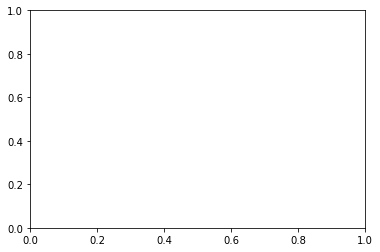

In [10]:
f, ax = plt.subplots()

- 몇 개의 행은 같은 사이즈로 그래프를 이루어져 있지만 축은 공간에 맞게 가로로 맞춰질 것입니다. 

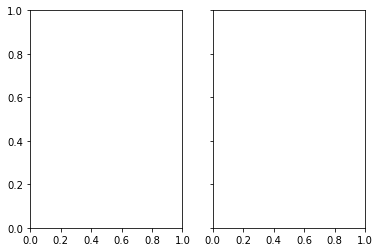

In [11]:
f, ax = plt.subplots(1,2, sharey=True)

- 반대로, figure-level 함수로 만들어지는 그래프는 정사각형 모양을 하고 있습니다. 
- 설명하기 위해 빈 그래프를 `FacetGrid`로 만들어 보겠습니다. 
- 이는 `relplot()`, `displot()`, `catplot()`과 같은 함수에 해당됩니다. 

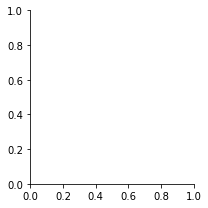

In [12]:
g = sns.FacetGrid(penguins)

- column이 추가된다면 그래프는 넓어질 것입니다. 그래서 서브플롯의 사이즈는 동일하게 될 것입니다. 

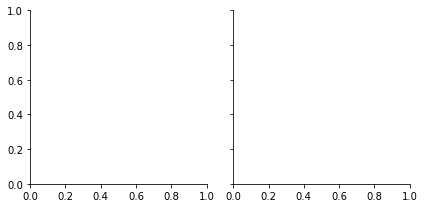

In [13]:
g = sns.FacetGrid(penguins, col="sex")

- 그래프의 사이즈는 파라미터에 명시함으로서 변경할 수 있습니다. 

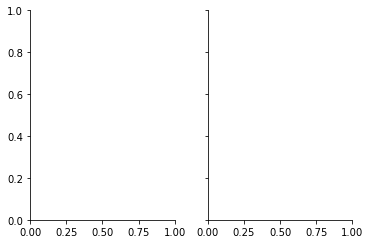

In [14]:
g = sns.FacetGrid(penguins, col='sex', height=3.5, aspect=.75)

- 결론적으로는 처음부터 facet 변수를 지정하면 사이즈는 신경쓰지 않아도 됩니다. 
- 불리한 점은 그래프의 크기를 변경하고 싶을때 matplotlib에서 작동하는 것과는 다르게 된다는 것을 인지해야합니다. 

## Relative merits of figure-level functions

- 위에서 나눈 내용을 토대로 장단점을 비교해봤습니다. 
- 장점 :
    - 데이터 변수로 쉽게 서브플롯 할 수 있다.
    - 기본적으로 범례가 바깥에 있다. 
    - 커스텀화 하기 편하다. 
    - 그래프의 사이즈 조절이 다르다. 
- 단점 : 
    - 파라미터를 바로 확인할 수 없다. 
    - matplotlib 그래프에 일부가 될 수 없다. 
    - matplotlib와 API가 다르다. 
    - 그래프의 사이즈 조절이 다르다.

- 모든 것을 감안했을 때 figure-level 함수는 초보자에게는 헷갈릴 수도 있지만 어떠한 부분에서는 강점을 보인다. 
- 튜토리얼 문서는 대부분 figure-level 함수를 사용한다. 그 이유는 더 깔끔한 그래프를 그리고 대부분의 경우 figure-level 함수를 사용하는 걸 추천한다. 
- 단 한가지의 경우, 복잡하고 standalone 그래프를 구성하는 많은 숫자의 다른 그래프로 이루어져있다면 figure-level 함수는 좋은 선택이 아니다. 
- 이 경우에는 matplotlib로 figure를 생성한 후 axes-level 함수로 채워나가는 것을 추천한다. 